In [1]:
from IPython.display import display, HTML
import scipy.constants as sc
from scipy.optimize import fsolve
from ipywidgets import interact, widgets
%matplotlib notebook

import numpy as np
import cmath
import matplotlib.pyplot as plt
import scipy.constants as sc
plt.rcParams.update({
    "text.usetex": True,
    'text.latex.preamble': r"\usepackage{amsmath} \boldmath"
})
import os
import h5py

print(os.getpid())
%cd ../../

11431
/media/work/docs/codes/QuCF/scripts-py


In [2]:
# --- Launch to change cells' width ---
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import pylib.mix as mix
import pylib.qucf_read as qucf_r
import pylib.qucf_oracle as qucf_o
import pylib.qucf_matrix_D as qucf_m
import ASE as ase
import pylib.qsvt_angles as qsvt_a

cmap_matrix = 'bwr'

for i in range(30):
    plt.close()

In [3]:
# ---------------------------------------------------------------
# --- Read data ---
# ---------------------------------------------------------------
mix.reload_module(ase)

print("\n--- Creating the object with data... ---")
data_ = ase.ASE_()

print("\n--- Reading matrices D from quantum simulations ---")
data_.read_D_matrices()

print("\n\n--- Reading matrices of the considered 1D kinetic problem --") 
data_.read_plasma_matrices()

print("--- Creating a template to extrapolate the matrix D for larger sizes ---") 
data_.create_D_template()


--- Creating the object with data... ---

--- Reading matrices D from quantum simulations ---

Reading the matrix from: flat_33_OUTPUT.hdf5
from the path: ../simulations/KIN1D1D/matrices-D/
date of the simulation:  06-06-2023 09:51:13
matrix name:  U_BE
N = 128

Reading the matrix from: flat_44_OUTPUT.hdf5
from the path: ../simulations/KIN1D1D/matrices-D/
date of the simulation:  06-06-2023 08:57:47
matrix name:  U_BE
N = 512

Reading the matrix from: flat_45_OUTPUT.hdf5
from the path: ../simulations/KIN1D1D/matrices-D/
date of the simulation:  06-23-2023 15:42:09
matrix name:  U_BE
N = 1024

Reading the matrix from: flat_54_OUTPUT.hdf5
from the path: ../simulations/KIN1D1D/matrices-D/
date of the simulation:  06-23-2023 15:48:52
matrix name:  U_BE
N = 1024


--- Reading matrices of the considered 1D kinetic problem --

Reading data from w12/out_3_3_w1.2_Lx100_Lv4_flat.hdf5...
date of the simulation:  06-22-2023 15:48:52
N, nx, nv = 128, 3, 3
Done.

Reading data from out_4_4_w1.2_Lx10

In [4]:
# --------------------------------------------------------------------
# --- Choose a case (matrix size) with which you are going to work ---
# --------------------------------------------------------------------
data_.choose_a_case(nx = 3, nv = 3)

original matrix >>>
amax. value: 			4.000e+00
amin.(excl. zero) value: 	6.118e-04

norm of the matrix:  7.5031421989152545

normalized matrix >>>
amax. value: 			4.690e-03
amin.(excl. zero) value: 	7.174e-07



<IPython.core.display.Javascript object>


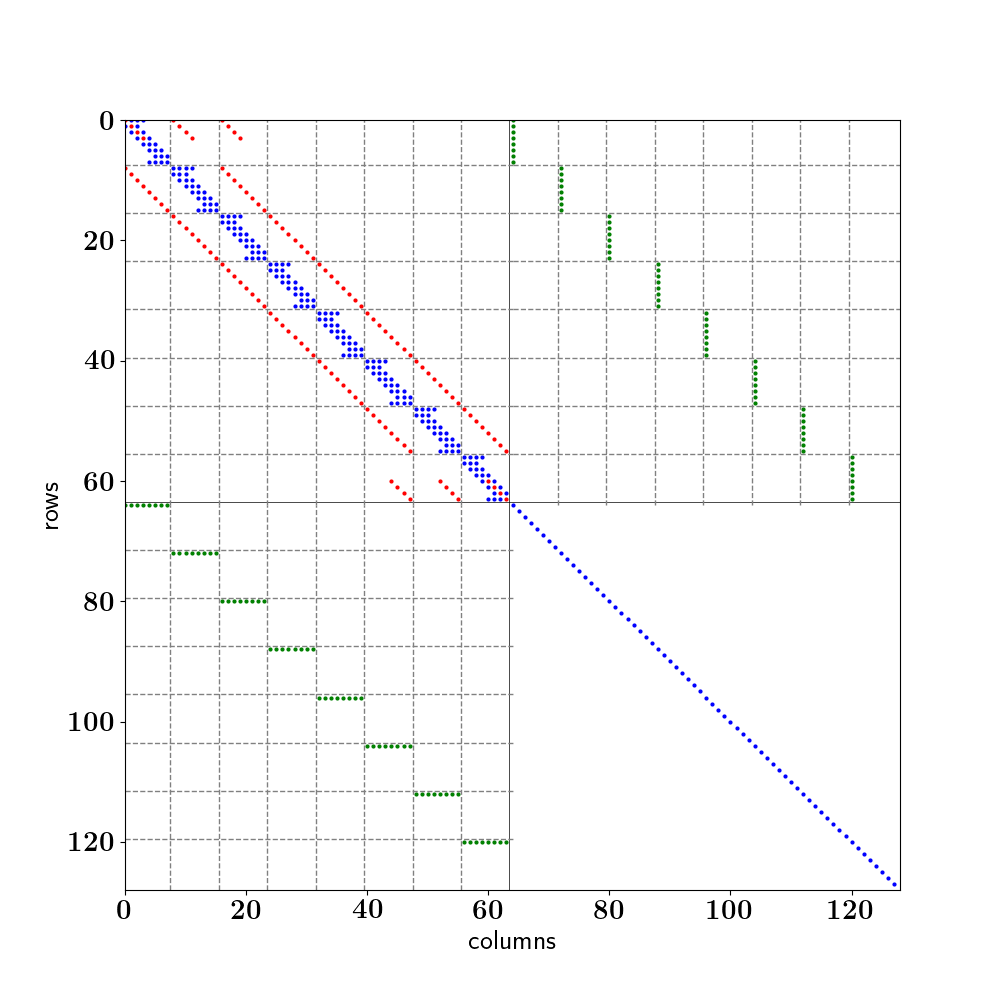

In [5]:
# ---------------------------------------------------------------
# --- Plot the original matrix indicating its structure ---
# ---------------------------------------------------------------
mix.reload_module(ase)
_ = ase.plot_colored_A_structure(
    data_.Nx_work_, data_.Nv_work_, 
    data_.BF_fixed_, data_.BF_prof_, data_.B_CE_, data_.B_Cf_, data_.BS_,
    flag_save = False, 
    path_save = data_.path_save_, 
    fontsize = 20, 
    cmap='bwr'
)

<IPython.core.display.Javascript object>


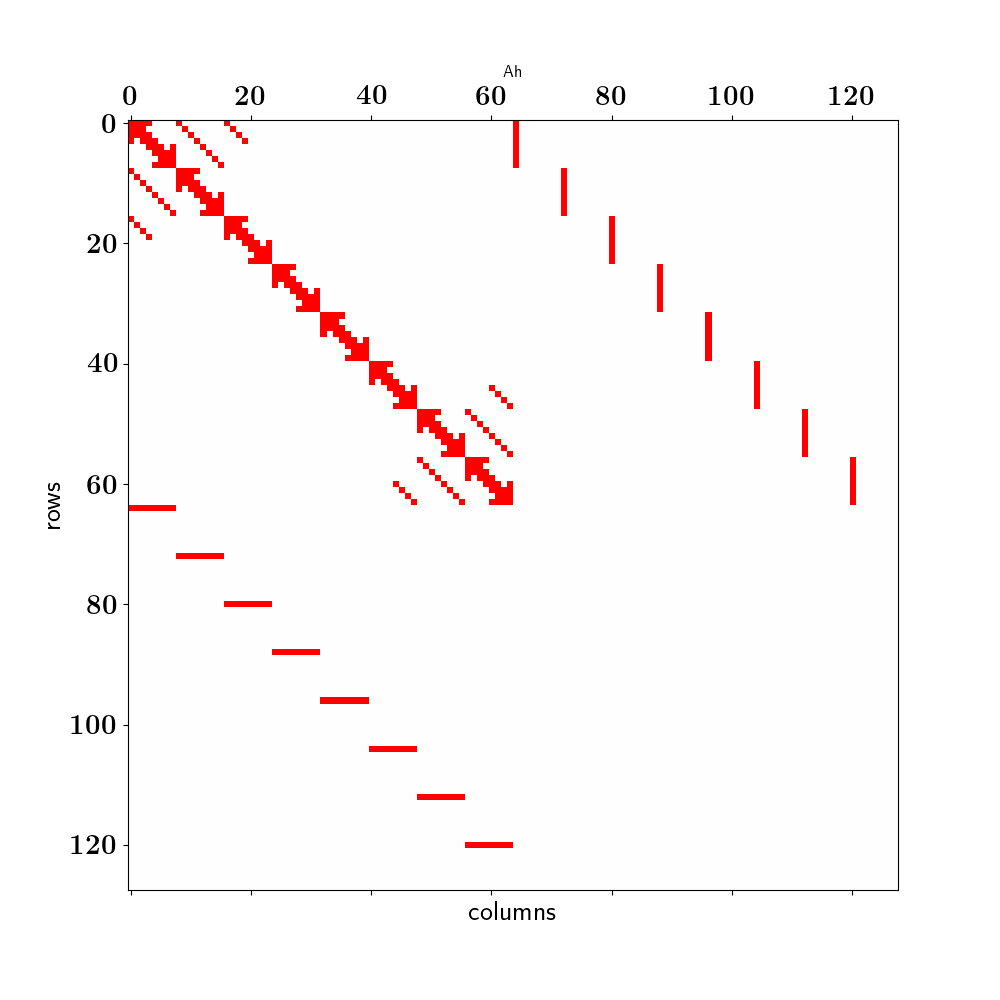

<IPython.core.display.Javascript object>


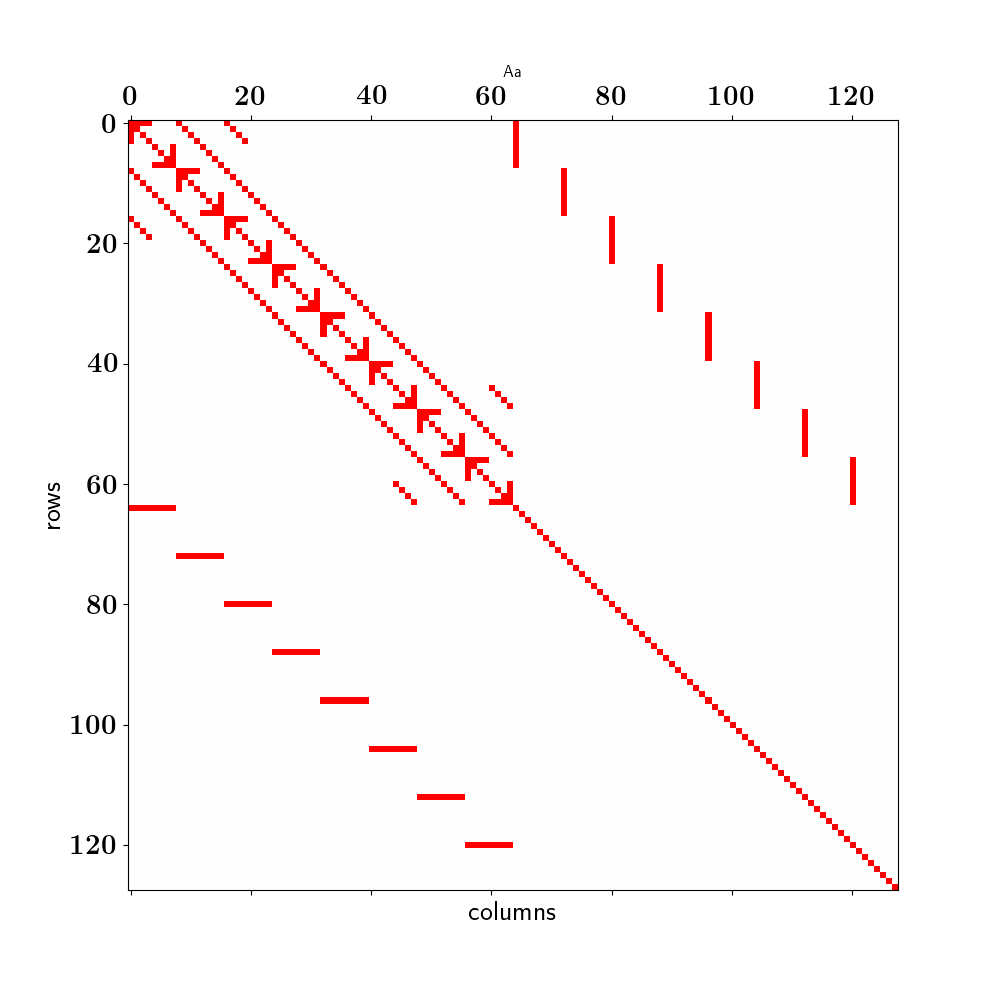

In [6]:
# -------------------------------------------------------------------
# --- Construct hermitian and anti-hermitian matrices ---
# -------------------------------------------------------------------
def h_adj(AA):
    return np.transpose(np.conjugate(AA))

def get_herm_aherm_parts(B):
    Bh = (B + h_adj(B)) / 2.
    Ba = (B - h_adj(B)) / (2.j)
    # B_ch = Bh + 1j * Ba
    return Bh, Ba

def create_mask(A):
    N = A.shape[0]
    A_mask = np.zeros((N,N))
    for ir in range(N):
        for ic in range(N):
            if np.abs(A[ir,ic]) > 1e-12:
                A_mask[ir, ic] = 1.0
    return A_mask


def plot_matrix_abs(A, name):
    # print("--- Plotting {:s} matrix ---".format(name))
    fontsize = 20
    
    A_mask = create_mask(A)

    fig1 = plt.figure(figsize=(10,10))
    ax = fig1.add_subplot(111)
    cs = ax.matshow(
        A_mask, 
        cmap=cmap_matrix, 
        vmin=-1, vmax = 1
    )
    plt.xlabel('columns', fontsize = fontsize)
    plt.ylabel("rows", fontsize = fontsize)
    plt.title(name)
    ax.tick_params(axis='both', which='major', labelsize=fontsize)
    return 


# -----------------------------------------------------------------------

A = data_.cl_work_["A"].form_dense_matrix()
Ah, Aa = get_herm_aherm_parts(A)
plot_matrix_abs(Ah, "Ah")
plot_matrix_abs(Aa, "Aa")